Last modified Jul. 11, 2020 by Luis Valdivia

In [2]:
# we will need these eventually
import matplotlib.pyplot as plt 
import math

# 1.
# a.

We simply use the values given as follows:

$$ p_2(x) = \frac{(x-1)(x-3)}{(0-1)(0-3)}(1) + \frac{(x-0)(x-3)}{(1-0)(1-3)}(1) + \frac{(x-0)(x-3)}{(3-0)(3-1)}(-5) $$

$$ = \frac{(x-1)(x-3)}{3} - \frac{(x)(x-3)}{2} -5 \frac{(x)(x-3)}{6} $$

$$ = -x^2 + x + 1.$$

# b. 

We evaluate $p_2(2)$ to approximate $f(2)$:

$$ p_2(2) = -(2^2) + 2 + 1 = -4 + 3 = -1.$$

# 2.

# a.

Given a set of pairwise distinct nodes, we want to evaluate the Lebesgue function at $x$.

In [430]:
# INPUT: a list of real-valued nodes, the point x to be evaluated at
# OUTPUT: Lebesgue function evaluated at x
def lebesgue(nodes, x):
    lj = []  
    for j in range(len(nodes)):
        top_prod = 1.0
        bot_prod = 1.0
        for i in range(len(nodes)):
            if i != j:
                top_prod *= x - nodes[i]
                bot_prod *= nodes[j] - nodes[i]
        lj.append(abs(top_prod / bot_prod))
    return sum(lj)

# b.

Now we want to use the equidistributed points in $[-1,1]$ with 3 different sets of nodes.

In [431]:
# first node set
n_1 = []
for i in range(5):
    n_1.append(-1 + (2.0 * i / 4))
    
# second node set
n_2 = []
for i in range(11):
    n_2.append(-1 + (2.0 * i / 10))

# third note set
n_3 = []
for i in range(21):
    n_3.append(-1 + (2.0 * i / 20))
    
# given each node set, we want to plot the Lebesgue function on [-1,1]
x_val = []
y1_val = []
y2_val = []
y3_val = []

for i in range(1001):
    x_val.append(-1 + (2.0 * i / 1000))
    y1_val.append(lebesgue(n_1, x_val[i]))
    y2_val.append(lebesgue(n_2, x_val[i]))
    y3_val.append(lebesgue(n_3, x_val[i]))

We plot the first node set, seeing that the maximum seems to be about 2.2, hence $\Lambda_4 = || L_4||_{\infty}$ is about 2.2.

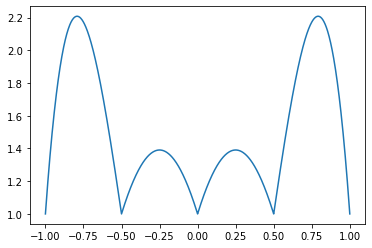

In [432]:
plt.plot(x_val, y1_val)

We plot the second node set, seeing that the maximum seems to be about 30, hence $\Lambda_{10} = || L_{10}||_{\infty}$ is about 30.

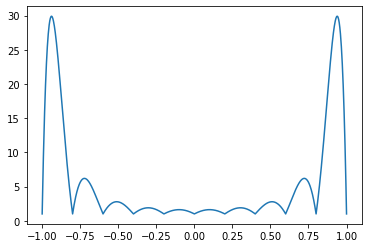

In [433]:
plt.plot(x_val, y2_val)

We plot the third node set, seeing that the maximum seems to be about 11000, hence $\Lambda_{20} = || L_{20}||_{\infty}$ is about 11000.

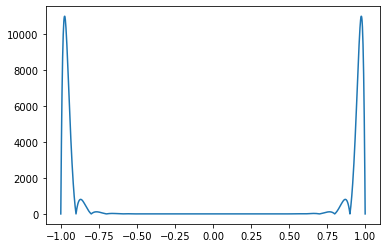

In [434]:
plt.plot(x_val, y3_val)

# c.

Now we want to use the Chebyshev nodes in $[-1,1]$ with 3 different sets of nodes.

In [435]:
# first node set
n_1 = []
for i in range(5):
    n_1.append(math.cos(i * math.pi / 4))
    
# second node set
n_2 = []
for i in range(11):
    n_2.append(math.cos(i * math.pi / 10))

# third note set
n_3 = []
for i in range(21):
    n_3.append(math.cos(i * math.pi / 20))
    
# given each node set, we want to plot the Lebesgue function on [-1,1]
x_val = []
y1_val = []
y2_val = []
y3_val = []

for i in range(1001):
    x_val.append(-1 + (2.0 * i / 1000))
    y1_val.append(lebesgue(n_1, x_val[i]))
    y2_val.append(lebesgue(n_2, x_val[i]))
    y3_val.append(lebesgue(n_3, x_val[i]))

We plot the first node set, seeing that the maximum seems to be about 1.8, hence $\Lambda_4 = || L_4||_{\infty}$ is about 1.8.

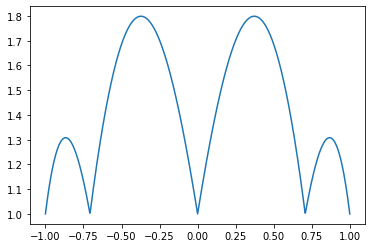

In [436]:
plt.plot(x_val, y1_val)

We plot the second node set, seeing that the maximum seems to be about 2.4, hence $\Lambda_{10} = || L_{10}||_{\infty}$ is about 2.4.

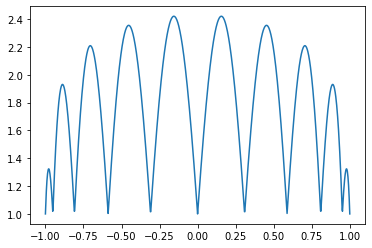

In [437]:
plt.plot(x_val, y2_val)

We plot the third node set, seeing that the maximum seems to be about 2.75, hence $\Lambda_{20} = || L_{20}||_{\infty}$ is about 2.75.

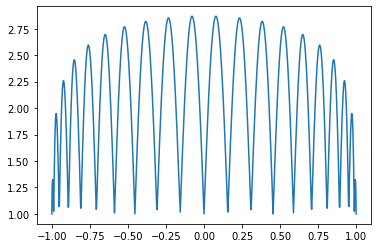

In [438]:
plt.plot(x_val, y3_val)

For the graphs of $L_n$, the equidistant nodes seem to peak around the boundary, while the Chebyshev nodes feel uniform, not peaking wildly anywhere. The $\Lambda_n$'s, as $n$ increases, also feel bounded with the Chebyshev nodes, growing at a slow rate and just reaching 2.75 at $n=20$, whereas with equidistant nodes, the values grow pretty high, up to 11000 for the same $n$.

# 3.

# a.

First, we write a script to compute the Barycentric weights.

In [439]:
# INPUT: a list of real-valued nodes
# OUTPUT: a list of real-valued barycentric weights for such node set
def bary_weights(nodes):
    l = [1.0]
    for m in range(1, len(nodes)):
        l.append(0)
        prod = 1.0
        for j in range(m):
            l[j] = l[j] / (nodes[j] - nodes[m])
            prod *= nodes[m] - nodes[j]   
        l[m] = 1 / prod
    return l

Now we can implement the Barycentric Formula for evaluating the interpolating polynomial for arbitrarily distributed nodes.

In [440]:
# INPUT: a list of real-valued nodes, a list f of the function evaluated at such nodes, a real value x
# OUTPUT: the interpolating polynomial evaluated at x
def bary_poly(nodes, f, x):
    b_nodes = bary_weights(nodes)
    bot_sum = 0.0
    top_sum = 0.0
    for i in range(len(b_nodes)):
        if x == nodes[i]:
            return f[i]
        top_sum += f[i] * b_nodes[i] / (x - nodes[i])
        bot_sum += b_nodes[i] / (x - nodes[i])
    return(top_sum / bot_sum)  

# b.

Now we approximate $f(2)$ given the data below.

In [441]:
node_set = [0.00, 0.25, 0.52, 0.74, 1.28, 1.50]
f_of_nodes = [0.0000, 0.7070, 1.0000, 0.7071, -0.7074, -1.0000]

bary_poly(node_set, f_of_nodes, 2) 

-2.3438296081728835

# 4.

First we want to define the function $f$ that we will be using. 

In [442]:
# INPUT: a real-valued x
# OUTPUT: f(x)
def f(x):
    return 1.0 / (1 + 25 * x * x)

# INPUT: a set of real-valued nodes
# OUTPUT: the set of f evaluated at such nodes
def eff(nodes):
    f_node = []
    for i in nodes:
        f_node.append(f(i))
    return(f_node)

We define an auxiliary function for calculating combinations.

In [443]:
# INPUT: two natural numbers n and k
# OUTPUT: n choose k
def nCk(n,k):
    return math.factorial(n) // math.factorial(k) // math.factorial(n-k)

# a.

Now we plot the interpolating polynomial $p_n$ of $f$ corresponding to the equidistributed nodes in $[-1,1]$, for $n = 4,8,12$. Note that we need to change our function for calculating barycentric weights.

In [444]:
# first node set
n_1 = []
for i in range(5):
    n_1.append(-1 + (2.0 * i / 4))
    
# second node set
n_2 = []
for i in range(9):
    n_2.append(-1 + (2.0 * i / 8))

# third note set
n_3 = []
for i in range(13):
    n_3.append(-1 + (2.0 * i / 12))

# we have to change bary_weights
# INPUT: a list of real-valued equidistributed nodes
# OUTPUT: a list of real-valued barycentric weights for such node set
def bary_weights(nodes):
    lj = []  
    for j in range(len(nodes)):
        lj.append(((-1.0) ** j) * nCk(len(nodes)-1, j))
    return lj

# given each node set, we want to plot the p_n on [-1,1]
x_val = []
y1_val = []
y2_val = []
y3_val = []

for i in range(1001):
    x_val.append(-1 + (2.0 * i / 1000))
    y1_val.append(bary_poly(n_1, eff(n_1), x_val[i]))
    y2_val.append(bary_poly(n_2, eff(n_2), x_val[i]))
    y3_val.append(bary_poly(n_3, eff(n_3), x_val[i]))

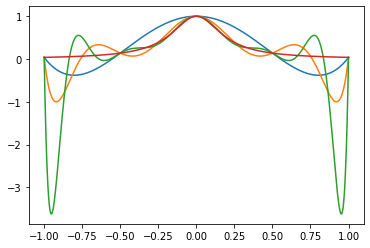

In [445]:
plt.plot(x_val, y1_val)
plt.plot(x_val, y2_val)
plt.plot(x_val, y3_val)
# for comparison, we also plot f
plt.plot(x_val, eff(x_val))

# b.

Now we plot the interpolating polynomial $p_n$ of $f$ corresponding to the Chebyshev nodes in $[-1,1]$, for $n = 4,8,12,100$. Note that we need to change our function for calculating barycentric weights.

In [446]:
# first node set
n_1 = []
for i in range(5):
    n_1.append(math.cos(i * math.pi / 4))
    
# second node set
n_2 = []
for i in range(11):
    n_2.append(math.cos(i * math.pi / 10))

# third node set
n_3 = []
for i in range(21):
    n_3.append(math.cos(i * math.pi / 20))
    
# fourth node set
n_4 = []
for i in range(101):
    n_4.append(math.cos(i * math.pi / 100))

# we have to change bary_weights
# INPUT: a list of real-valued equidistributed nodes
# OUTPUT: a list of real-valued barycentric weights for such node set
def bary_weights(nodes):
    lj = []  
    lj.append(0.5)
    for j in range(1,len(nodes)-1):
        lj.append(((-1.0) ** j))
    lj.append(0.5 * (-1.0) ** (j+1))
    return lj

# given each node set, we want to plot the p_n on [-1,1]
x_val = []
y1_val = []
y2_val = []
y3_val = []
y4_val = []

for i in range(1001):
    x_val.append(-1 + (2.0 * i / 1000))
    y1_val.append(bary_poly(n_1, eff(n_1), x_val[i]))
    y2_val.append(bary_poly(n_2, eff(n_2), x_val[i]))
    y3_val.append(bary_poly(n_3, eff(n_3), x_val[i]))
    y4_val.append(bary_poly(n_4, eff(n_4), x_val[i]))

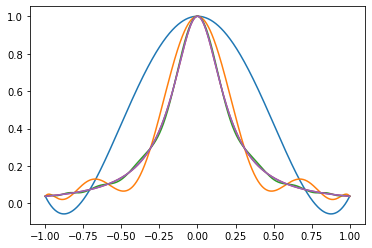

In [447]:
plt.plot(x_val, y1_val)
plt.plot(x_val, y2_val)
plt.plot(x_val, y3_val)
plt.plot(x_val, y4_val)
# for comparison, we also plot f
plt.plot(x_val, eff(x_val))

# c.

Now we want to plot the error for (a). 

In [448]:
# first node set
n_1 = []
for i in range(5):
    n_1.append(-1 + (2.0 * i / 4))
    
# second node set
n_2 = []
for i in range(9):
    n_2.append(-1 + (2.0 * i / 8))

# third note set
n_3 = []
for i in range(13):
    n_3.append(-1 + (2.0 * i / 12))

# we have to change bary_weights
# INPUT: a list of real-valued equidistributed nodes
# OUTPUT: a list of real-valued barycentric weights for such node set
def bary_weights(nodes):
    lj = []  
    for j in range(len(nodes)):
        lj.append(((-1.0) ** j) * nCk(len(nodes)-1, j))
    return lj

# given each node set, we want to plot the p_n on [-1,1]
x_val = []
y1_val = []
y2_val = []
y3_val = []

for i in range(1001):
    x_val.append(-1 + (2.0 * i / 1000))
    y1_val.append(f(x_val[i]) - bary_poly(n_1, eff(n_1), x_val[i]))
    y2_val.append(f(x_val[i]) - bary_poly(n_2, eff(n_2), x_val[i]))
    y3_val.append(f(x_val[i]) - bary_poly(n_3, eff(n_3), x_val[i]))

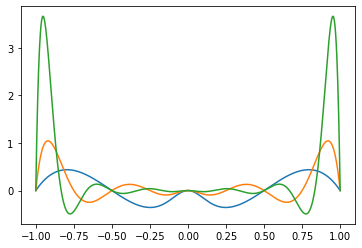

In [449]:
plt.plot(x_val, y1_val)
plt.plot(x_val, y2_val)
plt.plot(x_val, y3_val)

Now we want to plot the error for (b). 

In [450]:
# first node set
n_1 = []
for i in range(5):
    n_1.append(math.cos(i * math.pi / 4))
    
# second node set
n_2 = []
for i in range(11):
    n_2.append(math.cos(i * math.pi / 10))

# third node set
n_3 = []
for i in range(21):
    n_3.append(math.cos(i * math.pi / 20))
    
# fourth node set
n_4 = []
for i in range(101):
    n_4.append(math.cos(i * math.pi / 100))

# we have to change bary_weights
# INPUT: a list of real-valued equidistributed nodes
# OUTPUT: a list of real-valued barycentric weights for such node set
def bary_weights(nodes):
    lj = []  
    lj.append(0.5)
    for j in range(1,len(nodes)-1):
        lj.append(((-1.0) ** j))
    lj.append(0.5 * (-1.0) ** (j+1))
    return lj

# given each node set, we want to plot the p_n on [-1,1]
x_val = []
y1_val = []
y2_val = []
y3_val = []
y4_val = []

for i in range(1001):
    x_val.append(-1 + (2.0 * i / 1000))
    y1_val.append(f(x_val[i]) - bary_poly(n_1, eff(n_1), x_val[i]))
    y2_val.append(f(x_val[i]) - bary_poly(n_2, eff(n_2), x_val[i]))
    y3_val.append(f(x_val[i]) - bary_poly(n_3, eff(n_3), x_val[i]))
    y4_val.append(f(x_val[i]) - bary_poly(n_4, eff(n_4), x_val[i]))

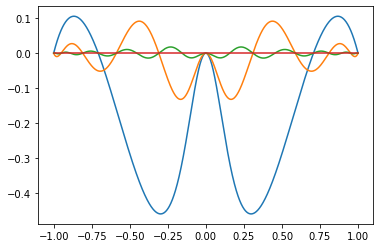

In [451]:
plt.plot(x_val, y1_val)
plt.plot(x_val, y2_val)
plt.plot(x_val, y3_val)
plt.plot(x_val, y4_val)

The first obvious observation is that the worst error for the Chebyshev nodes is about 0.4, while for the equidistributed nodes its close to 3.5. Moreover, the error for the latter came at a higher degree polynomial, whereas the former has a decreasing pattern in error. The error for the former seems worst closer to the middle, whereas the latter has the highest error near the boundary of the interval.

# d.

We redefine $f$.

In [452]:
# INPUT: a real-valued x
# OUTPUT: f(x)
def f(x):
    return(math.e ** (-x * x))

Then we plot the interpolating polynomial $p_n$ of $f$ corresponding to the equidistributed nodes in $[-1,1]$, for $n = 4,8,12$.

In [453]:
# first node set
n_1 = []
for i in range(5):
    n_1.append(-1 + (2.0 * i / 4))
    
# second node set
n_2 = []
for i in range(9):
    n_2.append(-1 + (2.0 * i / 8))

# third note set
n_3 = []
for i in range(13):
    n_3.append(-1 + (2.0 * i / 12))

# we have to change bary_weights
# INPUT: a list of real-valued equidistributed nodes
# OUTPUT: a list of real-valued barycentric weights for such node set
def bary_weights(nodes):
    lj = []  
    for j in range(len(nodes)):
        lj.append(((-1.0) ** j) * nCk(len(nodes)-1, j))
    return lj

# given each node set, we want to plot the p_n on [-1,1]
x_val = []
y1_val = []
y2_val = []
y3_val = []

for i in range(1001):
    x_val.append(-1 + (2.0 * i / 1000))
    y1_val.append(bary_poly(n_1, eff(n_1), x_val[i]))
    y2_val.append(bary_poly(n_2, eff(n_2), x_val[i]))
    y3_val.append(bary_poly(n_3, eff(n_3), x_val[i]))

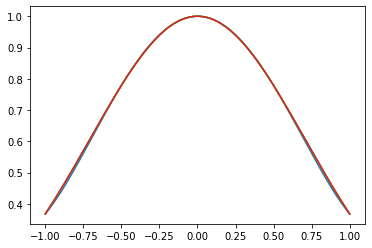

In [454]:
plt.plot(x_val, y1_val)
plt.plot(x_val, y2_val)
plt.plot(x_val, y3_val)
# for comparison, we also plot f
plt.plot(x_val, eff(x_val))

The graphs look like they overlap. There is clearly very high accuracy for polynomial approximations even for small values of $n$(which should not be surprising since $f$ is analytic in $\mathbb{C}$).

# 5.

# a.

So we have that Newton's form for $p_n$ is 

$$ p_n(x) = f[x_0] + f[x_0, x_1](x − x_0) + \dots + f[x_0, \dots , x_n](x − x_0) \dots (x − x_{n−1}) $$

and the Lagrange form is 

$$ p_n(x) = \sum_{j=0}^{n} \prod_{k = 0, k \neq j}^n \frac{(x - x_k)}{(x_j - x_k)} f(x_j) $$

$$ = \sum_{j=0}^{n} f(x_j) \prod_{k = 0, k \neq j}^n \frac{(x - x_k)}{(x_j - x_k)}.$$

Notice that in Newton's form, the last term is the multiple of a constant times $n$ monomials, hence multiplies into a polynomial of degree $n$. Since none of the other terms multiply out to a polynomial of the same degree, we know that the last term's coefficient is the leading term. So the leading coefficient of $p_n$ is $f[x_0, \dots , x_n]$.


Now we look at the Lagrange form. For each $j$ we multiply out the product inside to get a polynomial of degree $n$, with leading term 

$$\frac{f(x_j)}{\prod_{k = 0, k \neq j}^n (x_j - x_k)},$$

then, if we take the sum of all these leading terms we get the leading term for $p_n$, which is

$$\sum_{j=0}^{n} \frac{f(x_j)}{\prod_{k = 0, k \neq j}^n (x_j - x_k)}.$$

Since we are looking at the leading coefficients of the same polynomial, we can conclude that they coincide, i.e.

$$f[x_0, \dots , x_n] = \sum_{j=0}^{n} \frac{f(x_j)}{\prod_{k = 0, k \neq j}^n (x_j - x_k)}.$$


# b.

Recall that multiplication is commutative, so the order in which we multiply the products on the right side of the previous equation does not matter. Then, recall that the addition is commutative, so the order in which we add the sums does not matter. So the order in which we number the nodes on the right side of the equation does not matter. Since we have the equality above, we can conclude that we can permute the nodes when calculating the divided differences.

# 6.

First we write a script for computing the divided differences.

In [1]:
# INPUT: n is the list [x0,...,xn] and f_n is the list [f(x0),...,f(xn)]
# OUTPUT: the divided differences f[x0,...,xn]
def div_diff(n, f_n):
    if len(n) == 0:
        return 0
    if len(n) == 1:
        return f_n[0]
    return (div_diff(n[1:], f_n[1:]) - div_diff(n[:(len(n) - 1)], f_n[:(len(n) - 1)]))/(n[len(n) - 1] - n[0])

Now we define $f$.

In [1]:
# INPUT: a real-valued x
# OUTPUT: f(x)
def f(x):
    return(x - 9 ** (-x))

Here, we are doing inverse interpolation, so we have the $y$-values as our nodes and the corresponding $x$-values as our inverse function evaluated at such nodes. We make these two corresponding lists below for the two given tuples.

In [457]:
y_nodes = [-0.106530659712633, 0.051188363905973]
inv_nodes = [0.5, 0.6]

Then, we want to calculate $x_2 = p_1(0) = x_0 - y_0 f^{-1}[y_0, y_1]$ and add it to inv_nodes. Then use $f$ to calculate $y_2 = f(x_2)$ and add it to y_nodes.

In [458]:
inv_nodes.append(inv_nodes[0] - y_nodes[0] * div_diff(y_nodes, inv_nodes))
y_nodes.append(f(inv_nodes[2]))

Similarly, we calculate

$$ x_3 = p_2(0) = x_0 - y_0 f^{-1}[y_0, y_1] + y_0 y_1 f^{-1}[y_0, y_1, y_2] $$

$$ = x_2 + y_0 y_1 f^{-1}[y_0, y_1, y_2],$$

and add it to inv_nodes. Then use $f$ to calculate $y_3 = f(x_3)$ and add it to y_nodes.

In [459]:
inv_nodes.append(inv_nodes[2] + y_nodes[0] * y_nodes[1] * div_diff(y_nodes, inv_nodes))
y_nodes.append(f(inv_nodes[3]))

In [460]:
print(inv_nodes[3], y_nodes[3])

0.5671432855048316 -7.686763003889041e-09


At this point, we see that when $x = 0.5671432855048316$, $f$ is pretty close to 0, so it's good enough.

In [19]:
nodes = [0,0.5,1]
y = [-1,1/6,8/9]
div_diff(nodes[:2], y[:2])

2.3333333333333335

In [14]:
1/6

0.16666666666666666